# Ingeligencja obliczeniowa

**Projekt 5: Przestrzenie Ciągłe**   
Olgierd Piofczyk, Kaja Dzielnicka

---

## Środowisko: Pendulum-v1

W ramach projektu zastosowaliśmy środowisko `Pendulum-v1` z biblioteki `gym`. Jest to klasyczny problemem sterowania, w którym zadaniem agenta jest balansowanie wahadła w pionie, startując z dowolnej pozycji. Agent otrzymuje negatywne nagrody za odchylenia od pionu oraz za dużą prędkość kątową.

## Algorytm: SAC

SAC jest algorytmem wzmacniającego uczenia, który łączy metody aktora-krytyka z maksymalizacją entropii. Celem jest nie tylko maksymalizacja nagrody, ale także eksploracja różnych działań.

## Implementacja

### Instalacja środowiska

In [1]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import SAC
import matplotlib.pyplot as plt
import os

### Zdefiniowanie folderu do zapisywania wyników

In [2]:
logs_dir = 'logs'
learning_algorithm = 'SAC'

if not os.path.exists(logs_dir):
    os.makedirs(logs_dir)

if not os.path.exists(learning_algorithm):
    os.makedirs(learning_algorithm)

### Metoda uczenia

In [12]:
def train(env, name, max_iters=10, timesteps=50000, hyperparams={}):

    model = SAC('MlpPolicy', env, verbose=1, tensorboard_log=logs_dir, **hyperparams)

    for iters in range(max_iters):
        model.learn(total_timesteps=timesteps, reset_num_timesteps=False)
        model.save(f'{learning_algorithm}/{name}_{timesteps*iters}')

### Metoda testowania

In [4]:
def test(env, path_to_model):
    model = SAC.load(path_to_model)

    obs = env.reset()[0]
    done = False
    while True:
        action, _states = model.predict(obs)
        obs, _, done, _, _ = env.step(action)

        if done:
            break

### Definicja środowiska i trening agenta

In [7]:
env = gym.make('Pendulum-v1', render_mode=None)
env_test = gym.make('Pendulum-v1', render_mode='human')

train(env, 1, 500)

test(env_test, 'SAC/{}0')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs\SAC_0


KeyboardInterrupt: 

tu wykresy

tu coś o wynikach

## Eksperymenty z różnymi wartościami hiperparametrów

Przeprwoadziliśmy eksperymenty z różnymi wartościami hiperparametrów, aby sprawdzić, jak wpływają one na wyniki uczenia. Wybraliśmy trzy hiperparametry: `learning_rate`, `batch_size` oraz `gamma`. Dla każdego z nich przetestowaliśmy trzy różne wartości:

In [13]:
hyperparameters = [
    {'learning_rate': 0.0003, 'batch_size': 256, 'gamma': 0.99},
    # {'learning_rate': 0.0001, 'batch_size': 128, 'gamma': 0.95},
    # {'learning_rate': 0.001, 'batch_size': 512, 'gamma': 0.9},
]

Następnie przeprowadziliśmy trening agenta dla każdej kombinacji hiperparametrów i zapisaliśmy wyniki. Poniżej przedstawiamy wykresy zależności wyników od wartości hiperparametrów.

In [14]:

train(env, "batch256", 10, 50000, hyperparameters[0])
# train(env, "batch128", 10, 50000, hyperparameters[1])
# train(env, "batch512", 10, 50000, hyperparameters[2])

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs\SAC_0


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.35e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 63        |
|    time_elapsed    | 12        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 21.8      |
|    critic_loss     | 0.305     |
|    ent_coef        | 0.814     |
|    ent_coef_loss   | -0.321    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -1.5e+03 |
| time/              |          |
|    episodes        | 8        |
|    fps             | 56       |
|    time_elapsed    | 28       |
|    total_timesteps | 1600     |
| train/             |          |
|    actor_loss      | 47.1     |
|    critic_loss     | 0.188   

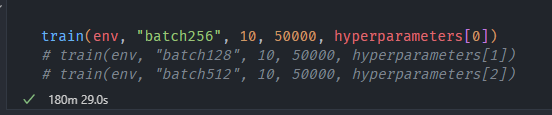

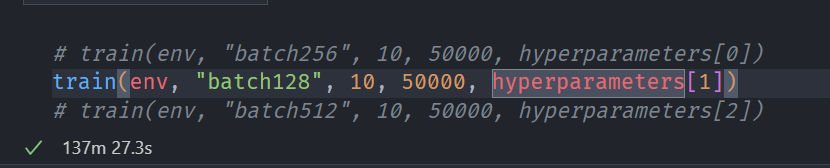

tu wykresy

tu podsumowanie wyników